In [5]:
import pandas as pd
import numpy as np
import random

# Set seed for reproducibility
np.random.seed(42)
random.seed(42)

# Generate synthetic data for 1000 entries
n = 1000
sizes = np.random.randint(500, 5000, size=n)  # Size in square feet
locations = np.random.choice(['urban', 'suburban', 'rural'], size=n, p=[0.4, 0.4, 0.2])
rooms = np.random.randint(1, 8, size=n)  # Number of rooms

# Generate price based on a rough linear model with noise
base_price = 50000 + sizes * 100 + rooms * 10000
location_multiplier = {'urban': 1.5, 'suburban': 1.2, 'rural': 0.9}
prices = [int(base_price[i] * location_multiplier[locations[i]] + np.random.normal(0, 20000)) for i in range(n)]

# Create DataFrame
df = pd.DataFrame({
    'Size': sizes,
    'Location': locations,
    'Number_of_Rooms': rooms,
    'Price': prices
})

# Save to CSV
file_path = 'house_prices.csv'
df.to_csv(file_path, index=False)
file_path



'house_prices.csv'

In [11]:
# Load the updated synthetic dataset
df_new = pd.read_csv('house_prices.csv')

# Step 1: Check for missing values
missing_values_new = df_new.isnull().sum()

# Step 2: Descriptive statistics for numeric columns
numeric_description_new = df_new[['Size', 'Number_of_Rooms', 'Price']].describe()
plt.tight_layout()
plt.show()

missing_values_new 


<Figure size 640x480 with 0 Axes>

Size               0
Location           0
Number_of_Rooms    0
Price              0
dtype: int64

In [13]:
numeric_description_new

,Size,Number_of_Rooms,Price
count,1000.000000,1000.000000,1000.000000
mean,2815.422000,3.991000,469204.982000
std,1255.514921,1.956207,183139.476843
min,503.000000,1.000000,112340.000000
25%,1749.500000,2.000000,325639.000000
50%,2862.500000,4.000000,456808.000000
75%,3849.500000,6.000000,604216.750000
max,4999.000000,7.000000,946434.000000


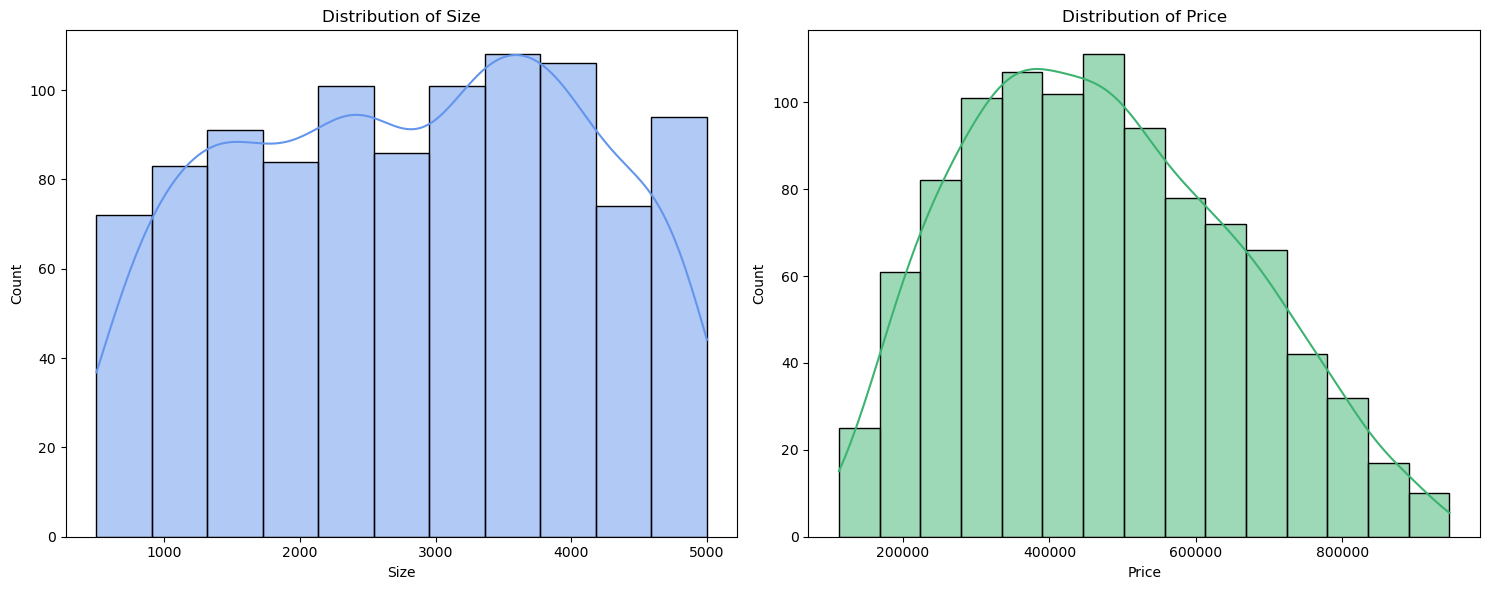

In [71]:
# Step 3: Distributions
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_new['Size'], kde=True, color='cornflowerblue')
plt.title('Distribution of Size')

plt.subplot(1, 2, 2)
sns.histplot(df_new['Price'], kde=True, color='mediumseagreen')
plt.title('Distribution of Price')

plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'Boxplot of Price')

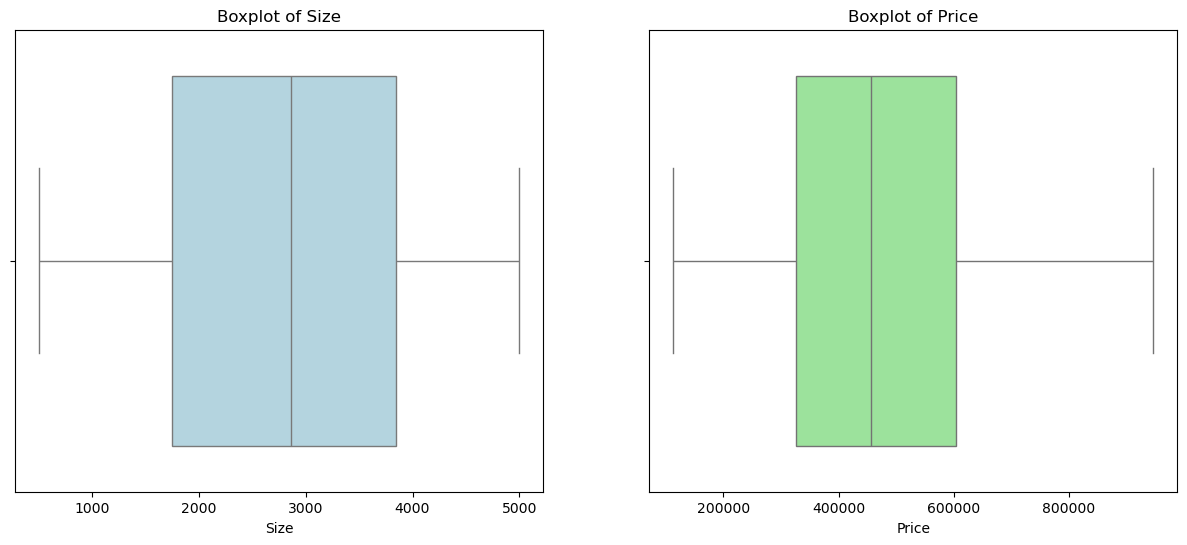

In [73]:
# Step 4: Boxplots for outlier detection
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_new['Size'], color='lightblue')
plt.title('Boxplot of Size')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_new['Price'], color='lightgreen')
plt.title('Boxplot of Price')

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Make a copy of the DataFrame
df_scaled = df.copy()

# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Choose one of the following scaling methods:

# --- Option 1: Min-Max Scaling ---
df_scaled[['Size', 'Number_of_Rooms']] = min_max_scaler.fit_transform(df_scaled[['Size', 'Number_of_Rooms']])

# --- Option 2: Standardization ---
#df_scaled[['Size', 'Number_of_Rooms']] = standard_scaler.fit_transform(df_scaled[['Size', 'Number_of_Rooms']])


In [33]:
# One-Hot Encoding for Location
df_encoded = pd.get_dummies(df_scaled, columns=['Location'], drop_first=True)


In [35]:
print(df_encoded.head())


       Size  Number_of_Rooms   Price  Location_suburban  Location_urban
0  0.190614         0.666667  348292               True           False
1  0.838301         0.500000  595750               True           False
2  0.687055         0.000000  466742               True           False
3  0.102980         1.000000  298647               True           False
4  0.983763         1.000000  749961               True           False


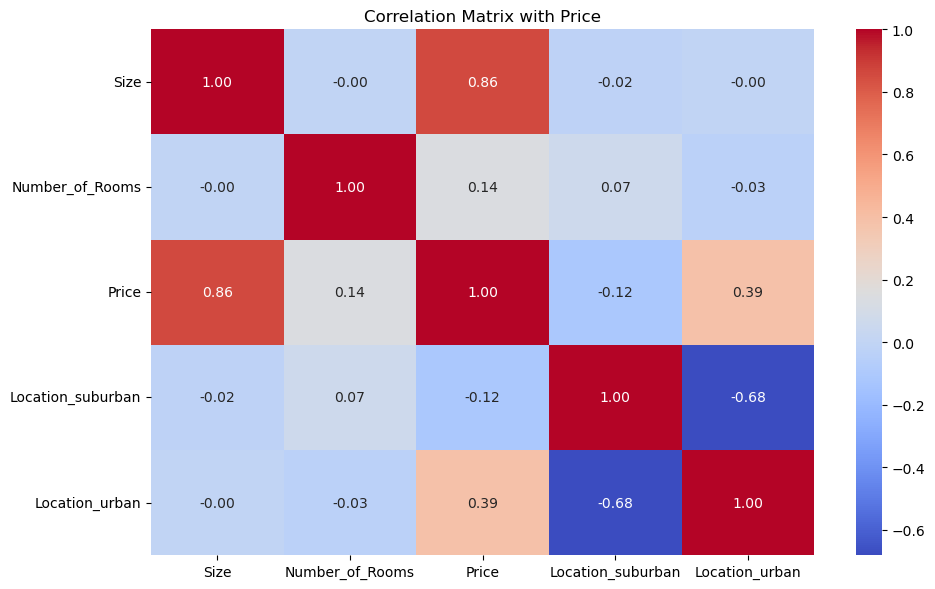

Correlation with Price:
 Price                1.000000
Size                 0.860192
Location_urban       0.386201
Number_of_Rooms      0.141783
Location_suburban   -0.115568
Name: Price, dtype: float64


In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('house_prices.csv')

# One-Hot Encode Location
df_encoded = pd.get_dummies(df, columns=['Location'], drop_first=True)

# Correlation Matrix
correlation_matrix = df_encoded.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Price')
plt.tight_layout()
plt.show()

# Show most correlated features with Price
correlation_with_price = correlation_matrix['Price'].sort_values(ascending=False)
print("Correlation with Price:\n", correlation_with_price)


In [43]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [45]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [49]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

# Predict
y_pred = lr_model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))


R² Score: 0.9608227379378278
MAE: 28590.326643999695
MSE: 1372638277.9919724
RMSE: 37049.13329609712


In [53]:
y_pred = lr_model.predict(X_test)

# Combine into a DataFrame
results = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

print(results.head(10))  # Show sample predictions


   Actual Price  Predicted Price
0        697763    725824.563030
1        504320    535446.955897
2        671642    700938.324945
3        916567    843305.228009
4        648191    638645.255170
5        611798    617502.661132
6        778464    751839.247608
7        474688    541275.241377
8        566678    582563.785341
9        808893    768803.237189


In [57]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


             Feature    Coefficient
3     Location_urban  226196.027854
2  Location_suburban  112433.112785
1    Number_of_Rooms   13480.811539
0               Size     127.696375


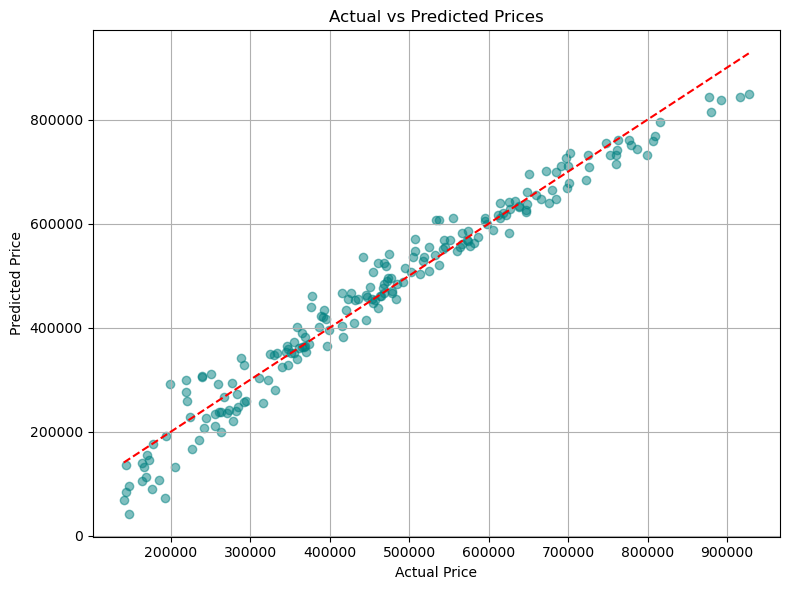

(   Actual Price  Predicted Price
 0        697763    725824.563030
 1        504320    535446.955897
 2        671642    700938.324945
 3        916567    843305.228009
 4        648191    638645.255170,
 0.9608227379378275,
 37049.13329609731,
 28590.32664399985,
              Feature    Coefficient
 0               Size  574122.901898
 3     Location_urban  226196.027854
 2  Location_suburban  112433.112785
 1    Number_of_Rooms   80884.869236)

In [61]:
# Re-run all necessary steps due to variable reset

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('house_prices.csv')

# One-Hot Encode Location
df_encoded = pd.get_dummies(df, columns=['Location'], drop_first=True)

# Scale numerical features
scaler = MinMaxScaler()
df_encoded[['Size', 'Number_of_Rooms']] = scaler.fit_transform(df_encoded[['Size', 'Number_of_Rooms']])

# Split into features and target
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Prepare results
results = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

# Feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Plot Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(results['Actual Price'], results['Predicted Price'], alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()

results.head(), r2, rmse, mae, coefficients


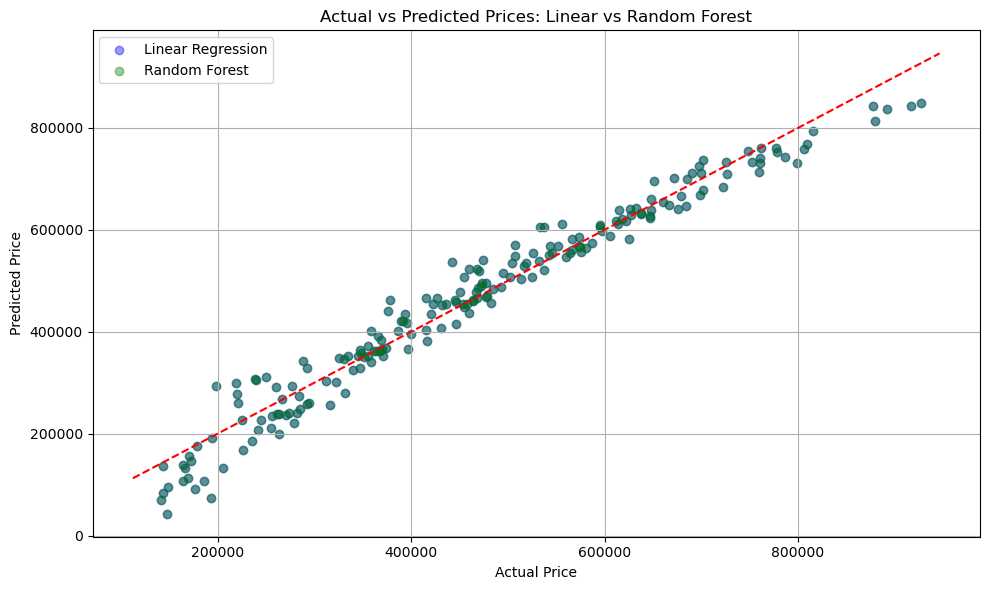

In [69]:
# Visual comparison of actual vs predicted for both models
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.4, label="Linear Regression", color="blue")
plt.scatter(y_test, y_pred, alpha=0.4, label="Random Forest", color="green")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices: Linear vs Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
